#### Import necessary packages

In [107]:
sns.set_style('whitegrid');

In [2]:
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("./dataset/stud.csv")

#### Reading the first 5 values

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### shape

In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checks to perform
##### ~ Missing value 
##### ~ Duplicate values
##### ~ Wrong datatype
##### ~ Number of unique values
##### ~ Statistics of each numerical cols

#### Missing values

In [16]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Duplicate columns

In [21]:
print(f'{df[df.duplicated()].shape[0]} duplicate rows')
df[df.duplicated()]



0 duplicate rows


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


#### Datatype check

In [22]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#### Statistics check

In [23]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [54]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

#### Categories in different columns

In [15]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"unique values in {col} \n{df[col].unique()}\n")

unique values in gender 
['female' 'male']

unique values in race_ethnicity 
['group B' 'group C' 'group A' 'group D' 'group E']

unique values in parental_level_of_education 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

unique values in lunch 
['standard' 'free/reduced']

unique values in test_preparation_course 
['none' 'completed']



#### Different categorical and numerical cols

In [34]:
print(f"numerical cols are \n {df.select_dtypes(include=['int']).columns}\n")
print(f"categorical cols are \n {df.select_dtypes(include=['object']).columns}")

numerical cols are 
 Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

categorical cols are 
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


#### Adding column of total and average marks

In [35]:
df['Total_marks']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_marks']=df['Total_marks']/3
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks,Average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Number of student with full marks

In [46]:
for col in df.select_dtypes(include=['int']).columns:
    print(f"total student scoring full marks in {col} - {df[df[col]==100]['Average_marks'].count()}")

total student scoring full marks in math_score - 7
total student scoring full marks in reading_score - 17
total student scoring full marks in writing_score - 14
total student scoring full marks in Total_marks - 0


In [48]:
for col in df.select_dtypes(include=['int']).columns:
    print(f"total student scoring less than 35 in {col} - {df[df[col]<=35]['Average_marks'].count()}")

total student scoring less than 35 in math_score - 27
total student scoring less than 35 in reading_score - 15
total student scoring less than 35 in writing_score - 18
total student scoring less than 35 in Total_marks - 1


#### Exploring data Visualization

<Axes: xlabel='Average_marks', ylabel='Count'>

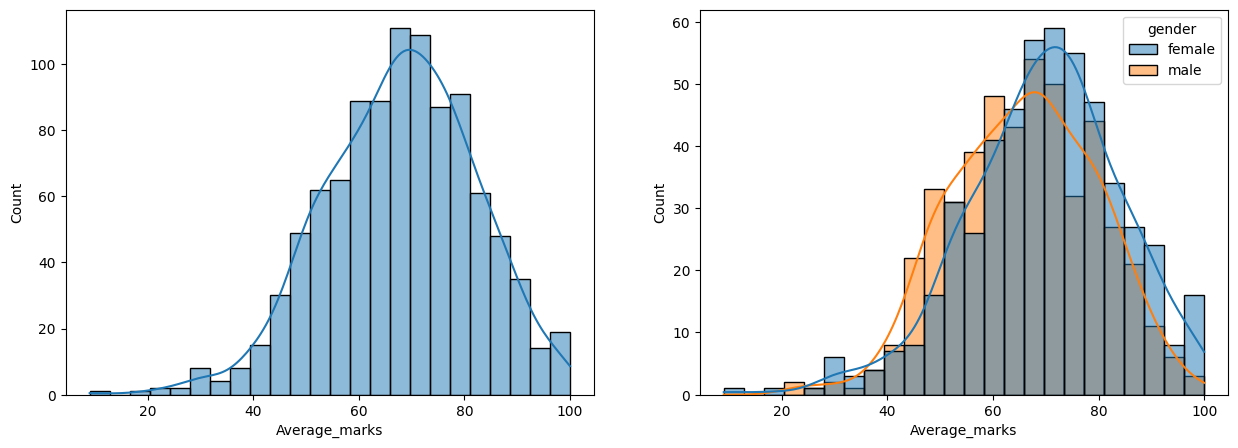

In [50]:
fig,axs=plt.subplots(1,2 , figsize=(15,5))
plt.subplot(121)
sns.histplot(df,x='Average_marks',kde=True)
plt.subplot(122)
sns.histplot(df,x='Average_marks',kde=True,hue='gender')
#: female have better average score than the males

<Axes: xlabel='Total_marks', ylabel='Count'>

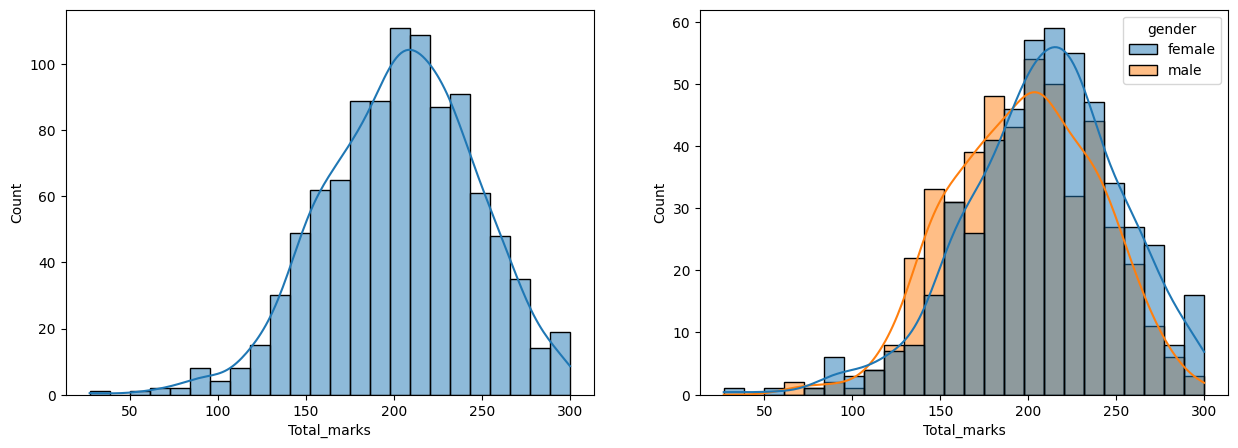

In [51]:
fig,axs=plt.subplots(1,2 , figsize=(15,5))
plt.subplot(121)
sns.histplot(df,x='Total_marks',kde=True)
plt.subplot(122)
sns.histplot(df,x='Total_marks',kde=True,hue='gender')
#: female have better total score than the males

In [52]:
df['Total_marks'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: Total_marks, dtype: float64

#### How Different Factor in better average scores

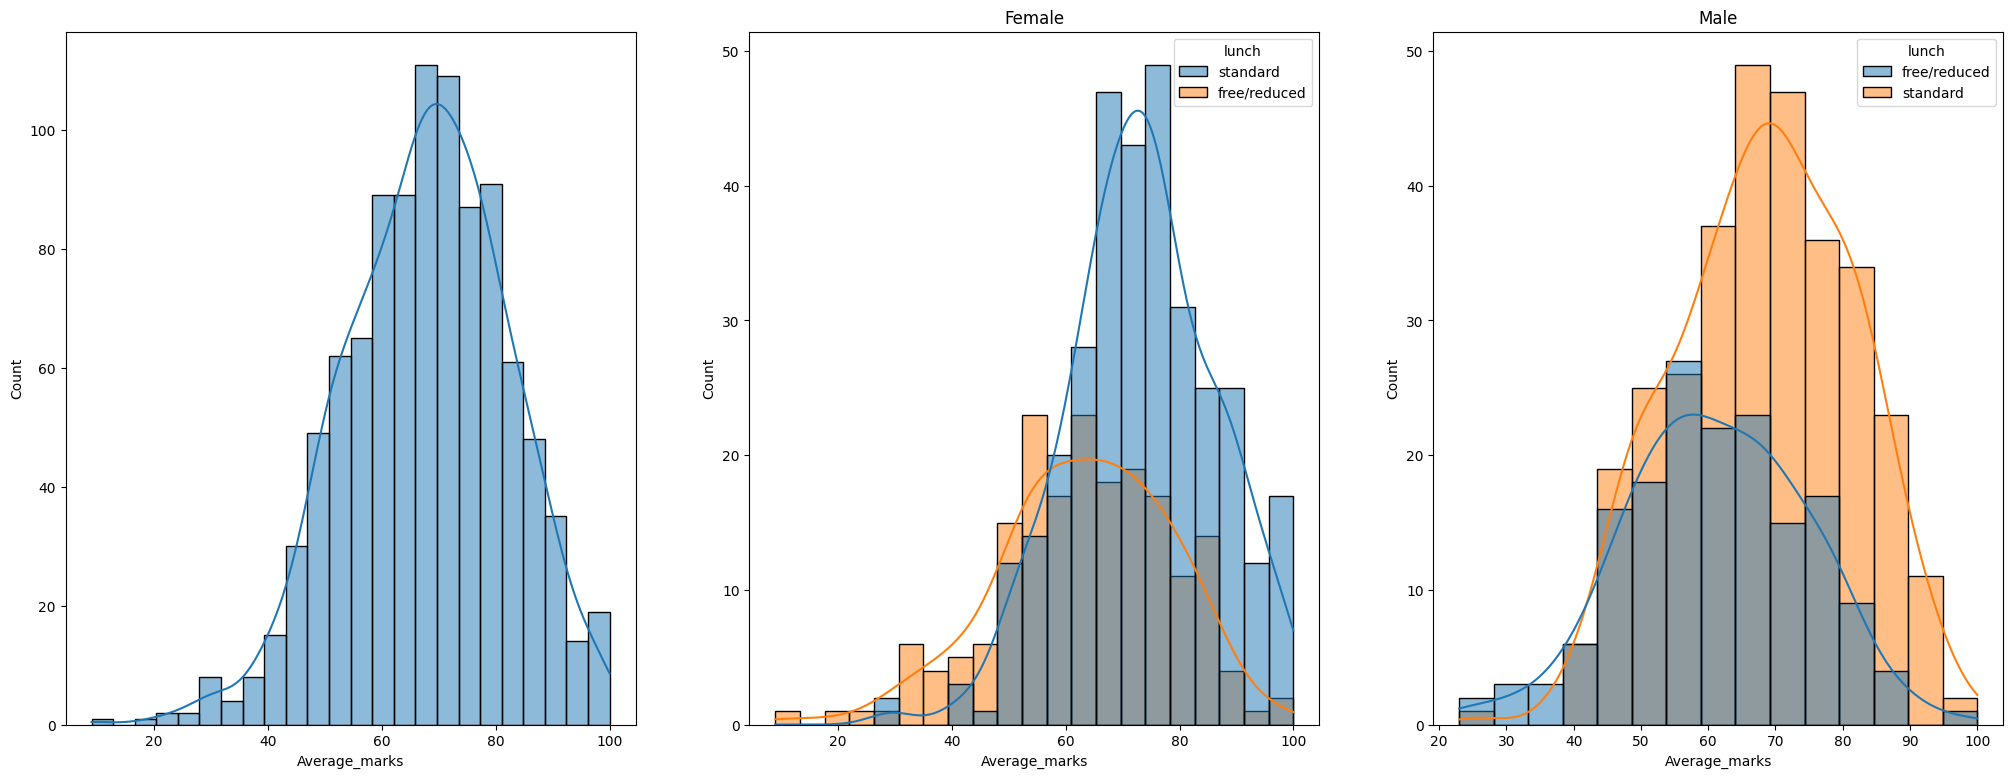

In [75]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df,x='Average_marks',kde=True)

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_marks',kde=True,hue='lunch')
plt.title('Female')


plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_marks',kde=True,hue='lunch')
plt.title('Male')
plt.show()

#: means that good quality of food help the student to yield better scores

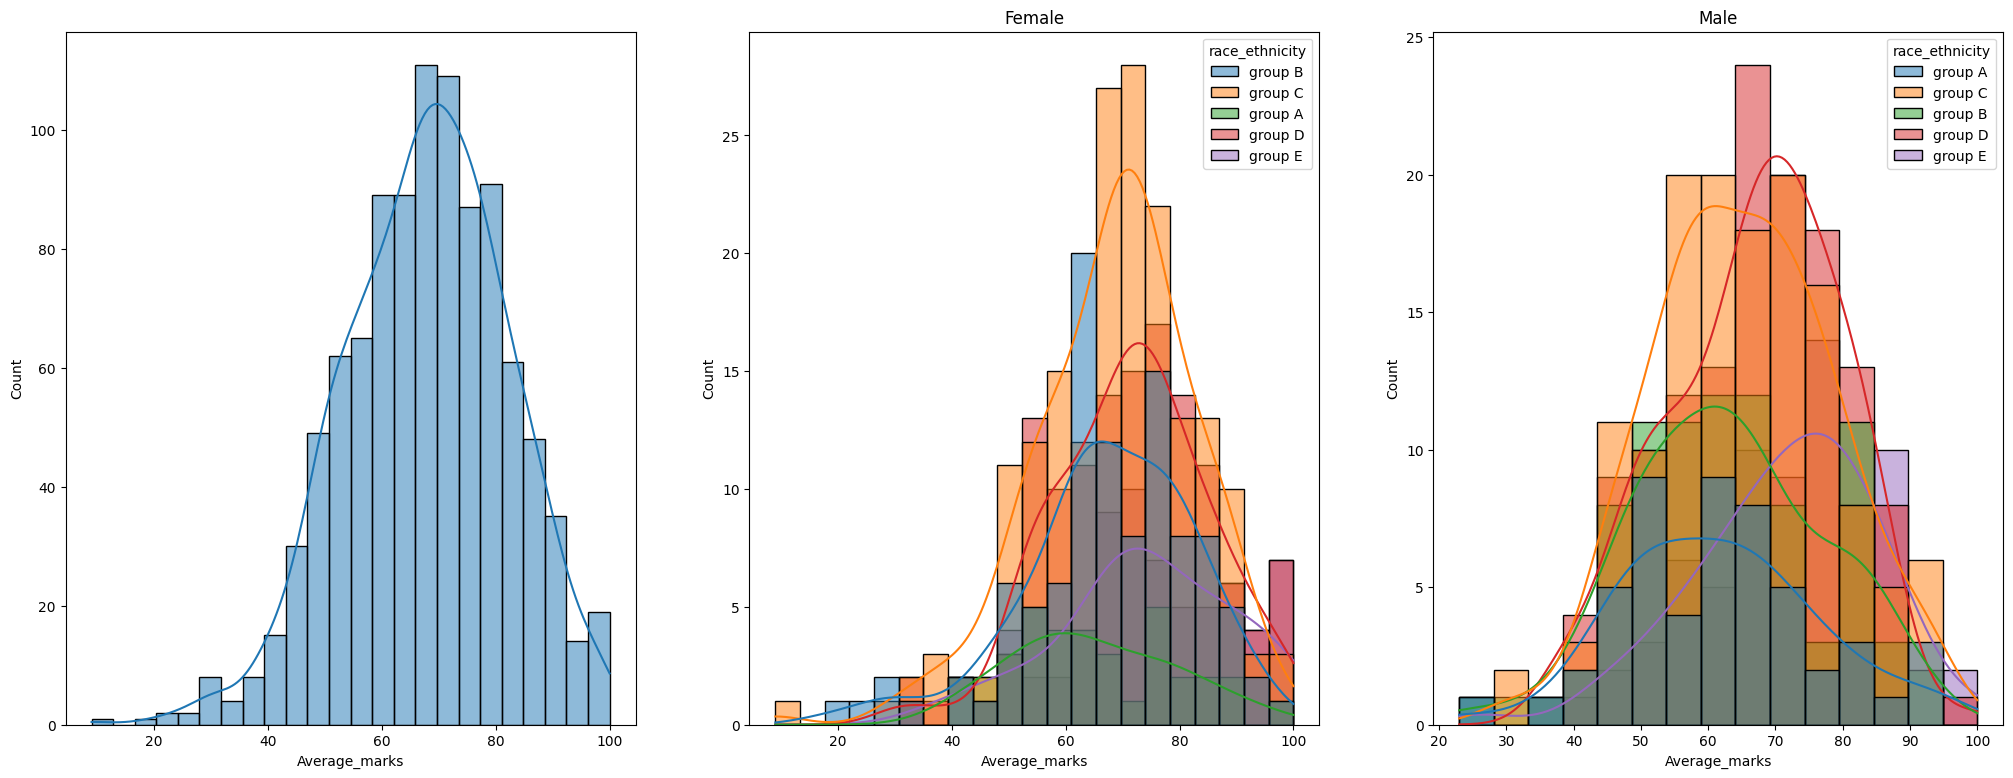

In [76]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df,x='Average_marks',kde=True)

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_marks',kde=True,hue='race_ethnicity')
plt.title('Female')


plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_marks',kde=True,hue='race_ethnicity')
plt.title('Male')
plt.show()

#: means that good quality of food help the student to yield better scores

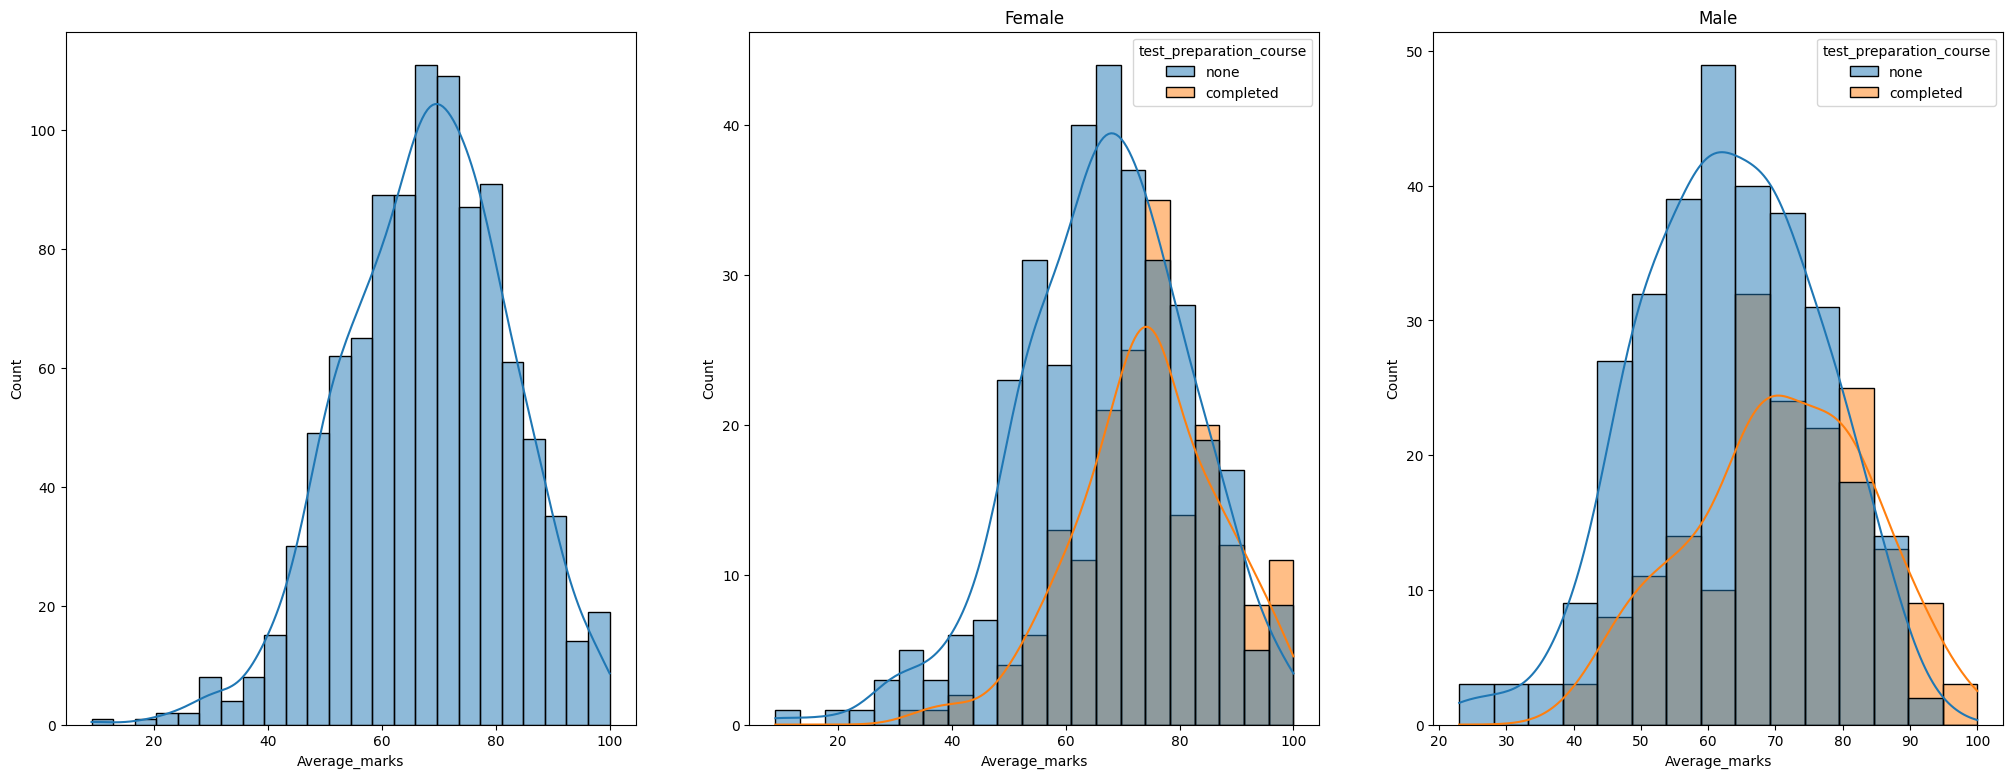

In [78]:

plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df,x='Average_marks',kde=True)

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_marks',kde=True,hue='test_preparation_course')
plt.title('Female')


plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_marks',kde=True,hue='test_preparation_course')
plt.title('Male')
plt.show()

#: means that good quality of food help the student to yield better scores

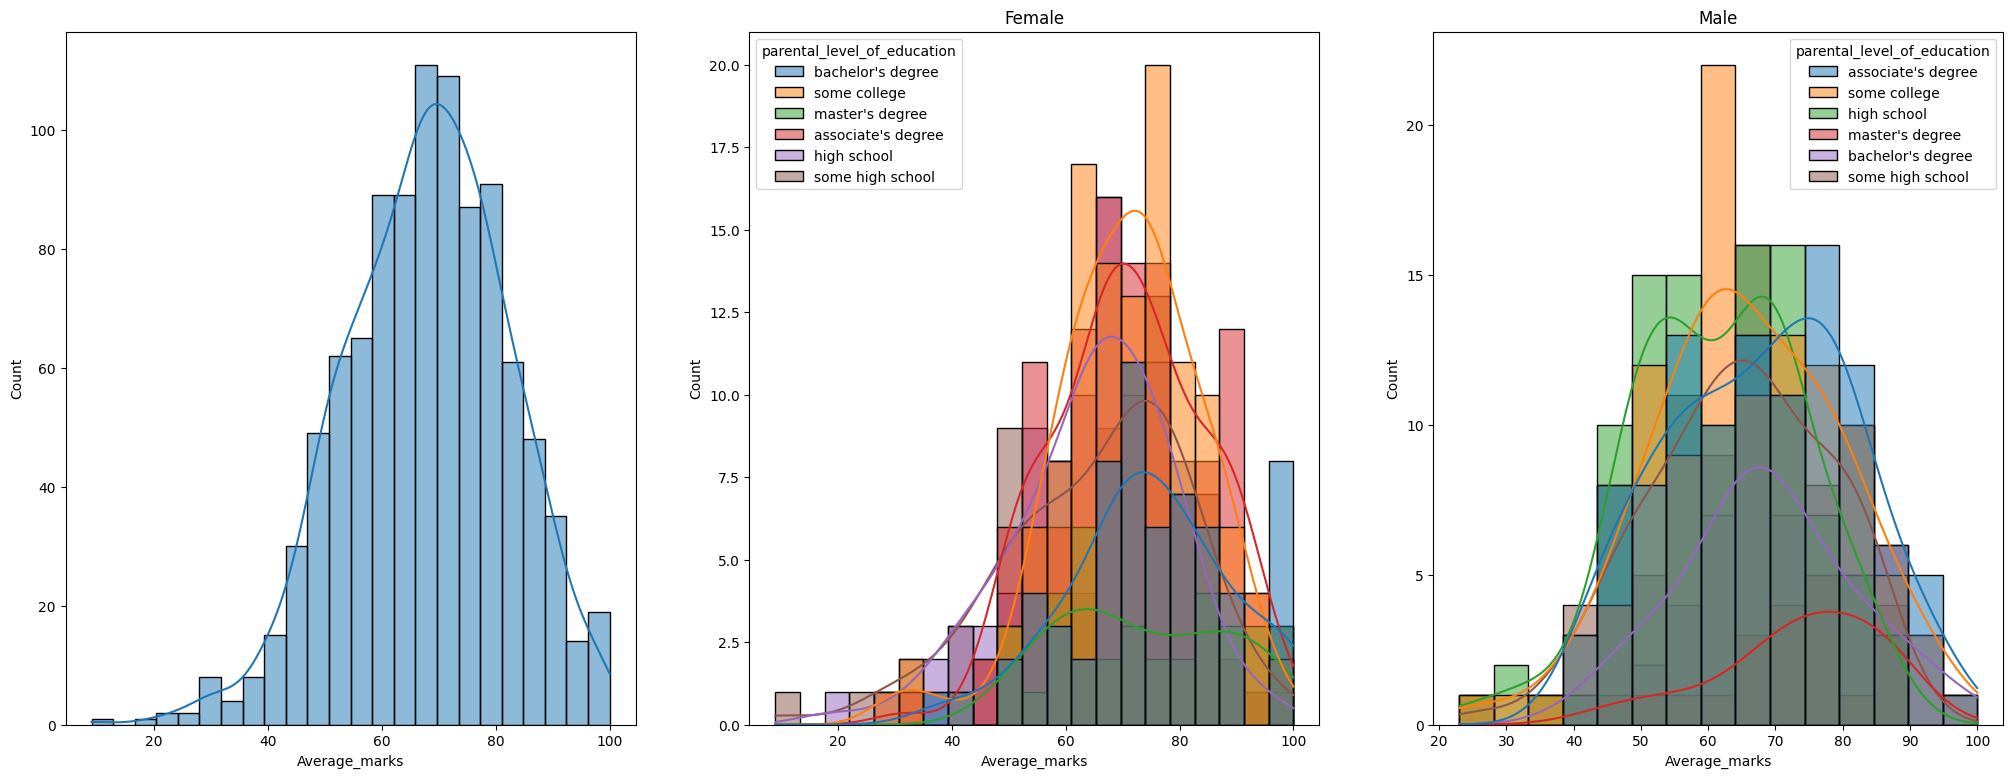

In [87]:


plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df,x='Average_marks',kde=True)

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_marks',kde=True,hue='parental_level_of_education')
plt.title('Female')


plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_marks',kde=True,hue='parental_level_of_education')
plt.title('Male')
plt.show()

#: means that good quality of food help the student to yield better scores

##### Mean score in all the subjects

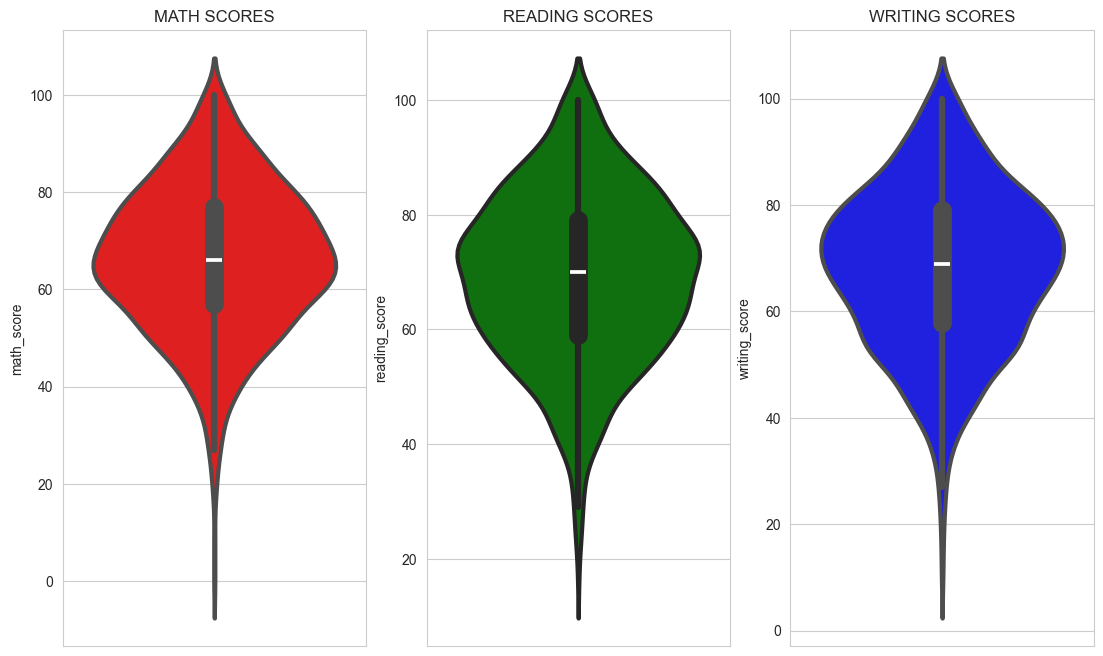

In [120]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [150]:
df.select_dtypes(include=['int']).columns

Index(['math_score', 'reading_score', 'writing_score', 'Total_marks'], dtype='object')

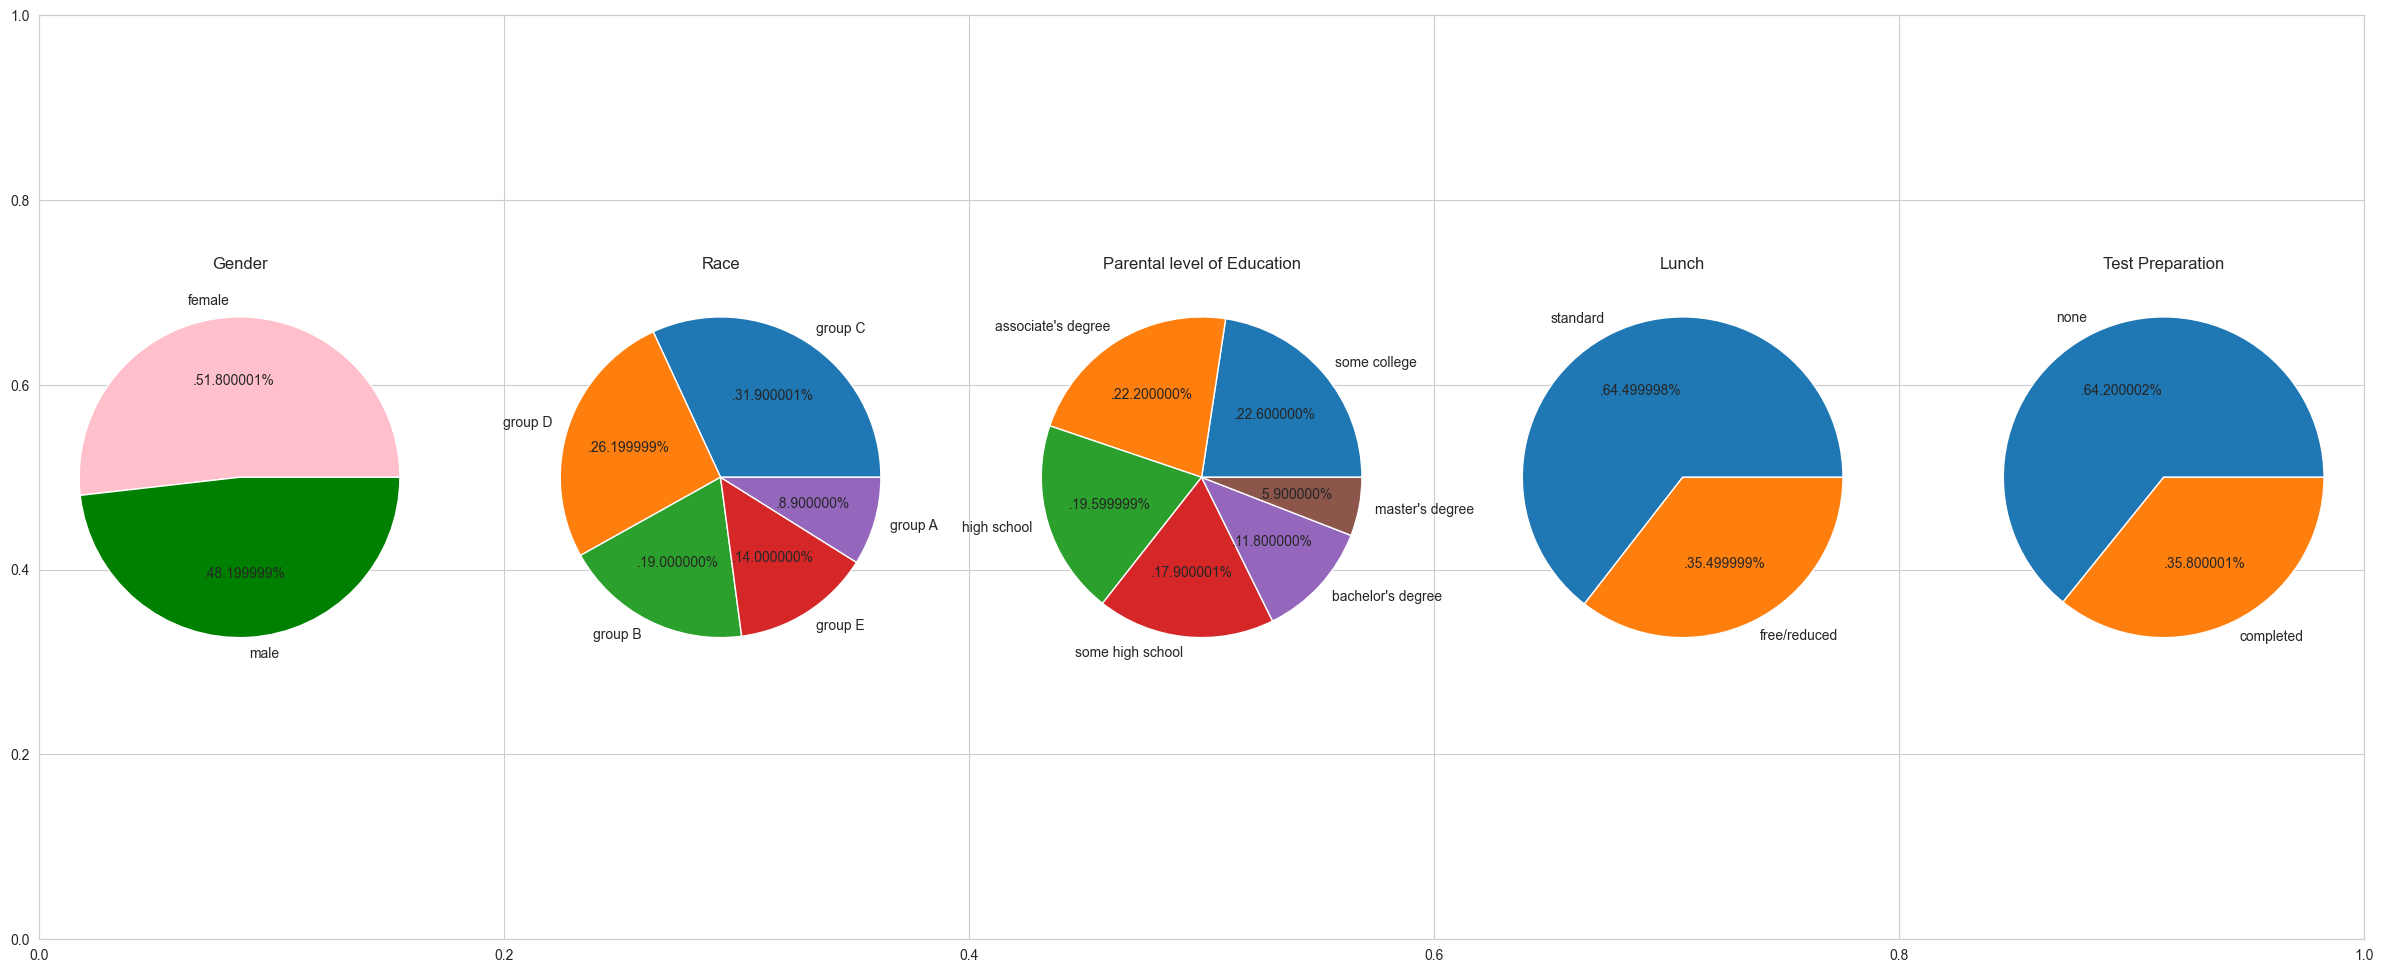

In [136]:
plt.subplots(figsize=(30,12))
plt.subplot(151)
size=df['gender'].value_counts()
labels=size.index
color=['pink','green']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%');
plt.title('Gender');


plt.subplot(152)
race=df['race_ethnicity'].value_counts()
labels=race.index
plt.pie(race,labels=labels,autopct='.%2f%%');
plt.title('Race');



plt.subplot(153)
parental=df['parental_level_of_education'].value_counts()
labels=parental.index
plt.pie(parental,labels=labels,autopct='.%2f%%');
plt.title('Parental level of Education');


plt.subplot(154)
lunch=df['lunch'].value_counts()
labels=lunch.index
plt.pie(lunch,labels=labels,autopct='.%2f%%');
plt.title('Lunch');


plt.subplot(155)
test=df['test_preparation_course'].value_counts()
labels=test.index
plt.pie(test,labels=labels,autopct='.%2f%%');
plt.title('Test Preparation');

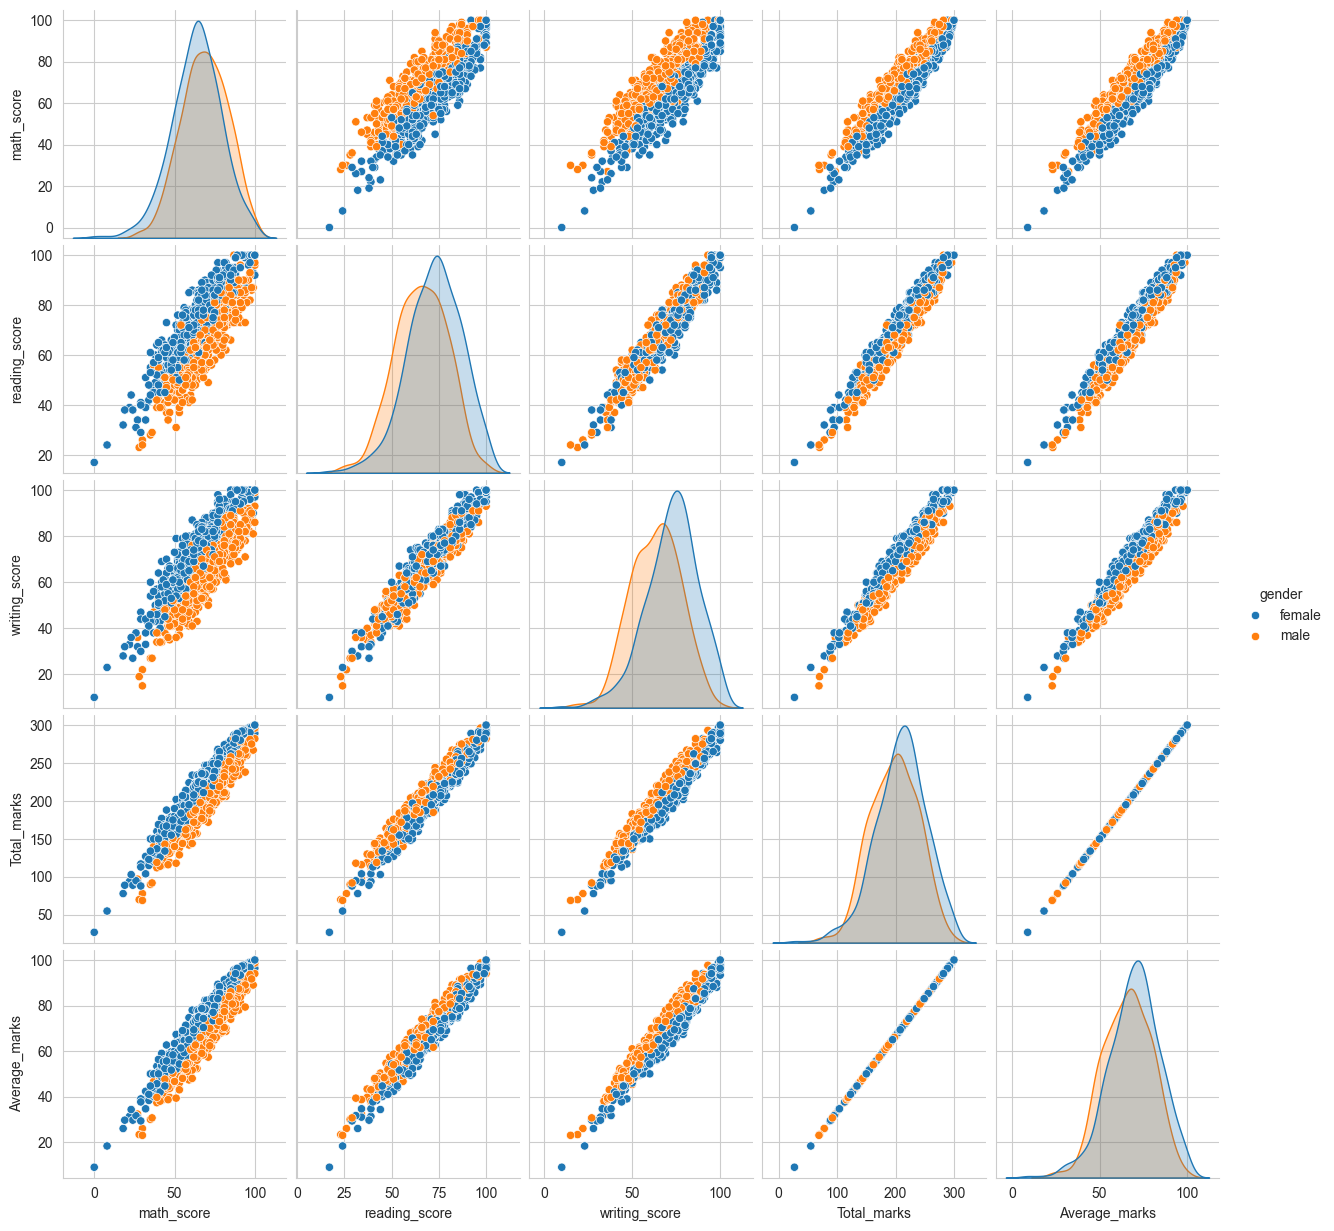

In [140]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [143]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [142]:
sub_df=df.copy()

In [144]:
cols=sub_df.columns
for col in cols:
    sub_df[col]=le.fit_transform(sub_df[col])

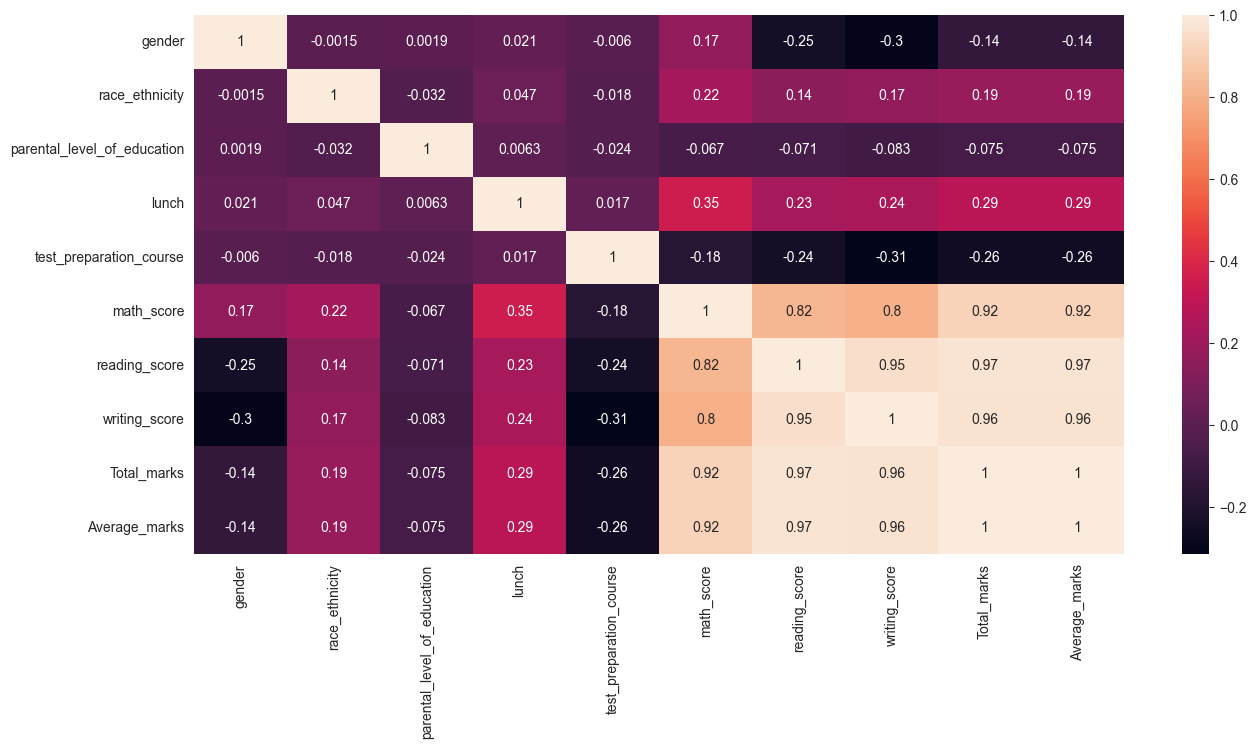

In [148]:
plt.figure(figsize=(15,7))
sns.heatmap(sub_df.corr(),annot=True)
plt.show()